## Домашнее задание к лекции «Корреляция и корреляционный анализ»

### 1 Задача - ответить на вопрос есть ли связь между жёсткостью воды и средней годовой смертностью?

- Построить точечный график
- Рассчитать коэффициенты корреляции Пирсона и Спирмена
- Построить модель линейной регрессии
- Рассчитать коэффициент детерминации
- Вывести график остатков

In [81]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams["figure.figsize"] = (10,7)

In [2]:
df = pd.read_csv('water.csv', index_col=0)
df.head()

,location,town,mortality,hardness
1,South,Bath,1247,105
2,North,Birkenhead,1668,17
3,South,Birmingham,1466,5
4,North,Blackburn,1800,14
5,North,Blackpool,1609,18


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 61 entries, 1 to 61
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   location   61 non-null     object
 1   town       61 non-null     object
 2   mortality  61 non-null     int64 
 3   hardness   61 non-null     int64 
dtypes: int64(2), object(2)
memory usage: 2.4+ KB


<AxesSubplot:xlabel='hardness', ylabel='mortality'>

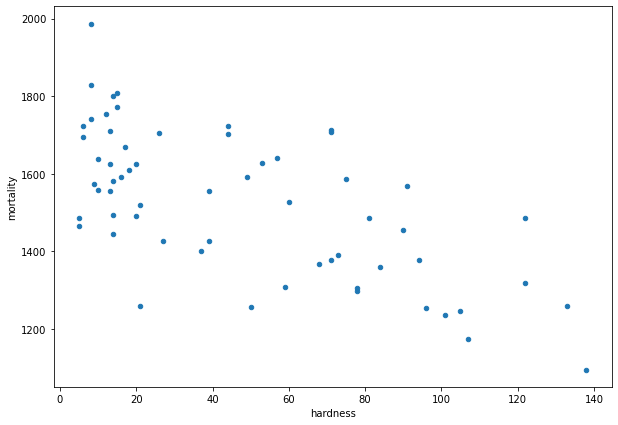

In [41]:
df.plot(kind='scatter', x='hardness', y='mortality')

Глядя на график, можно предположить, что связь есть, зависимость обратная. Максимальное из имеющихся значение смертности (и довольно крупное скопление точек, обозначающих высокие показатели смертности) отмечено при низком значении показателя жесткости воды, минимальное из имеющихся значение смертности достигается при максимальном значении показателя жесткости.

In [5]:
# коэффициент Пирсона
df[['hardness', 'mortality']].corr()

,hardness,mortality
hardness,1.000000,-0.654849
mortality,-0.654849,1.000000


In [6]:
# коэффициент Спирмана
df[['hardness', 'mortality']].corr(method='spearman')

,hardness,mortality
hardness,1.000000,-0.631665
mortality,-0.631665,1.000000


Полученные значения коэффициентов корреляции близки по значению (Пирсон = -0,655, Спирмен = -0,632), оба указывают на наличие не очень сильной обратной взаимосвязи.  

In [7]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [24]:
# если есть зависимость между переменными, то логично предположить, что жесткость воды влияет на смертность, а не наоборот.
x = df[['hardness']]
y = df['mortality']

In [62]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.31, random_state=146)

In [63]:
model = LinearRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
y_pred

array([1399.53149147, 1626.98697941, 1611.4078364 , 1608.2920078 ,
       1408.87897728, 1499.23800673, 1620.75532221, 1626.98697941,
       1514.81714974, 1430.68977749, 1608.2920078 , 1430.68977749,
       1514.81714974, 1352.79406245, 1620.75532221, 1324.75160503,
       1271.7825188 , 1440.0372633 , 1623.87115081])

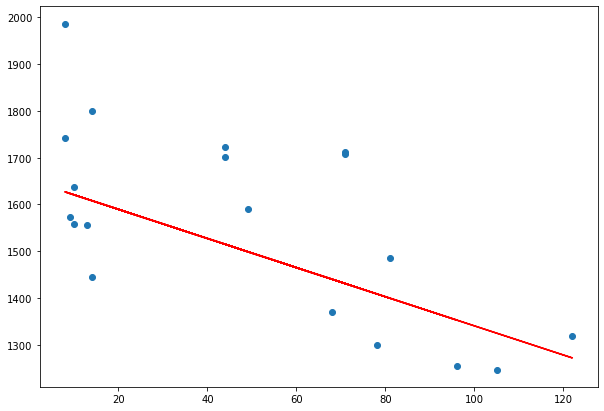

In [64]:
plt.scatter(x_test, y_test)
plt.plot(x_test, y_pred, c='r')

In [65]:
# коэффициент детерминации
model.score(x_test, y_test)

0.3264271953972949

Коэффициент детерминации не близок к 1, т.е. построенная регрессия не так хорошо объясняет зависимость данных. Стоит еще учитывать, что у нас не очень много имеющихся данных (61 запись в датасете), и построить на них хорошую модель может быть проблематично.

Во всяком случае построенная модель так же демонстрирует обратную зависимость смертности от жесткости воды.

Можно попробовать улучшить качество модели. Так как данных мало, разные варианты разбиения выборки на тренировочную и тестовую существенного повышения значения коэффициента детерминации не дают. Можно изменить значения параметра random_state и посмотреть, будет ли меняться коэффициент.
Построим модель при значениях random_state от 1 до 9999 и выберем в итоге наилучшее значение, которое даст максимальный коэффициент детерминации

In [61]:
lst_index = []
model = LinearRegression()
for i in range(1, 10000):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.31, random_state=i)
    model.fit(x_train, y_train)
    if model.score(x_test, y_test) > 0.6:
        lst_index.append((model.score(x_test, y_test), i))
        

print(max(lst_index, key=lambda item: item[0]))


(0.7570280355687193, 6383)


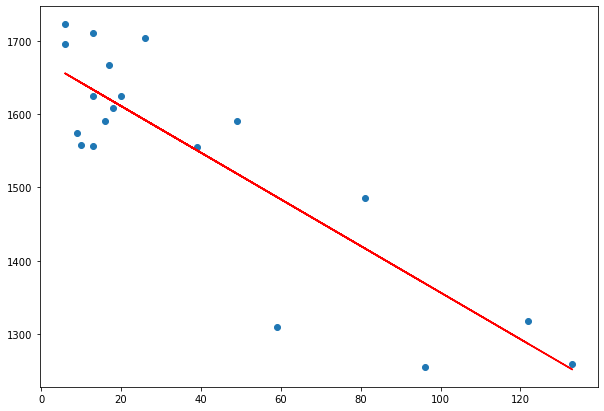

In [66]:
# построим модель с полученным параметром = 6383
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.31, random_state=6383)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
plt.scatter(x_test, y_test)
plt.plot(x_test, y_pred, c='r')

In [67]:
model.score(x_test, y_test)

0.7570280355687193

Видим, что разбиение получили немного другое. Но это дало существенный прирост коэффициента детерминации. Теперь он приближен к 1, значит, такая модель лучше объясняет нашу зависимость данных.

Стоит учитывать, что на среднегодовую смертность населения влияет множество факторов, и жесткость воды может быть одним из них, а может и не быть. Однако, во всяком случае мы видим не причинно-следственную, но статистическую связь между поведением двух рассматриваемых величин.

<AxesSubplot:xlabel='hardness', ylabel='mortality'>

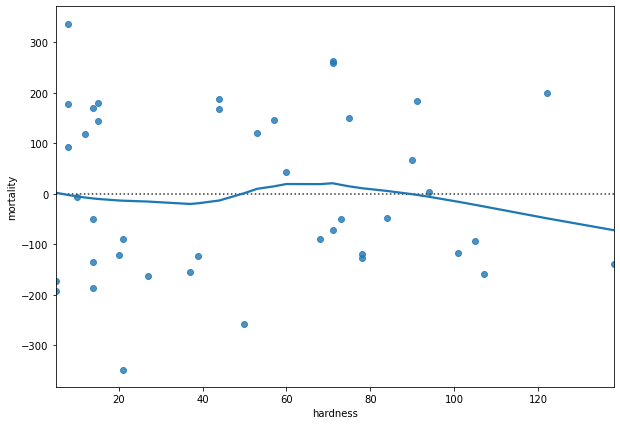

In [85]:
# теперь посмотрим на остатки
residuals = y_train-model.predict(x_train)
sns.residplot(x=x_train, y=y_train-model.predict(x_train), lowess=True)

Видим, что остатки распределены достаточно хаотично. В чередовании знаков не прослеживается закономерностей. Это говорит о корректности построенной модели

<AxesSubplot:xlabel='mortality'>

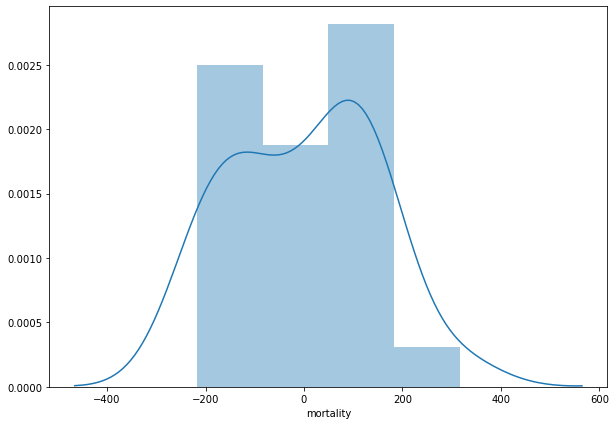

In [117]:
sns.distplot(residuals)

### 2 Задание - cохраняется ли аналогичная зависимость для северных и южных городов по отдельности?

- Разделить данные на 2 группы
- Повторить аналогичные шаги из пункта 1 для каждой группы по отдельности

In [97]:
# разделим наши данные по территориям север-юг
df_north = df[df['location']=='North']
df_south = df[df['location']=='South']

In [98]:
df_north.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35 entries, 2 to 61
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   location   35 non-null     object
 1   town       35 non-null     object
 2   mortality  35 non-null     int64 
 3   hardness   35 non-null     int64 
dtypes: int64(2), object(2)
memory usage: 1.4+ KB


In [100]:
df_south.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26 entries, 1 to 60
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   location   26 non-null     object
 1   town       26 non-null     object
 2   mortality  26 non-null     int64 
 3   hardness   26 non-null     int64 
dtypes: int64(2), object(2)
memory usage: 1.0+ KB


Посмотрим на данные по северным городам:

<AxesSubplot:xlabel='hardness', ylabel='mortality'>

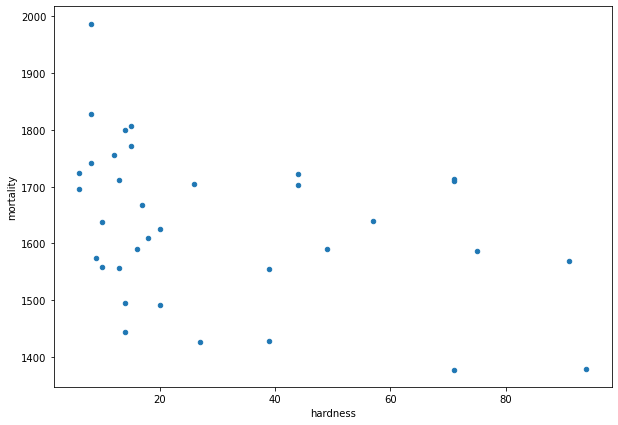

In [101]:
df_north.plot(kind='scatter', x='hardness', y='mortality')

In [104]:
# коэффициент Пирсона
df_north[['hardness', 'mortality']].corr()

,hardness,mortality
hardness,1.000000,-0.368598
mortality,-0.368598,1.000000


In [105]:
# коэффициент Спирмана
df_north[['hardness', 'mortality']].corr(method='spearman')

,hardness,mortality
hardness,1.000000,-0.404208
mortality,-0.404208,1.000000


Глядя на график можно предположить, что есть некая обратная зависимость между показателями, но достаточно слабая. Менее выраженная, чем в случае с полным датасетом. Это подтверждают и значения коэффициентов Пирсона и Спирмена

In [134]:
x = df_north[['hardness']]
y = df_north['mortality']

In [135]:
# подберем параметр random_state для модели
lst_index = []
model_north = LinearRegression()
for i in range(1, 10000):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=i)
    model_north.fit(x_train, y_train)
    if model_north.score(x_test, y_test) > 0.3:
        lst_index.append((model_north.score(x_test, y_test), i))
        

print(max(lst_index, key=lambda item: item[0]))

(0.5033286961083134, 7174)


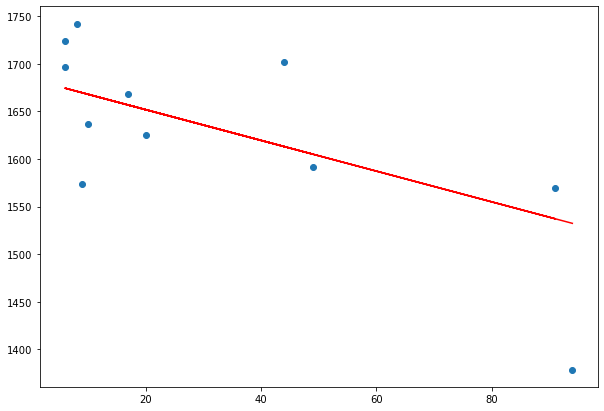

In [136]:
# построим модель
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=7174)
model_north.fit(x_train, y_train)
y_pred_north = model_north.predict(x_test)
plt.scatter(x_test, y_test)
plt.plot(x_test, y_pred_north, c='r')

In [137]:
model_north.score(x_test, y_test)

0.5033286961083134

Значение коэффициента детерминации ощутимо меньше, чем в прошлый раз - модель мы получили менее точную. Но с учетом того, насколько маленький у нас теперь датасет, предполагаю, что это ожидаемо.

<AxesSubplot:xlabel='hardness', ylabel='mortality'>

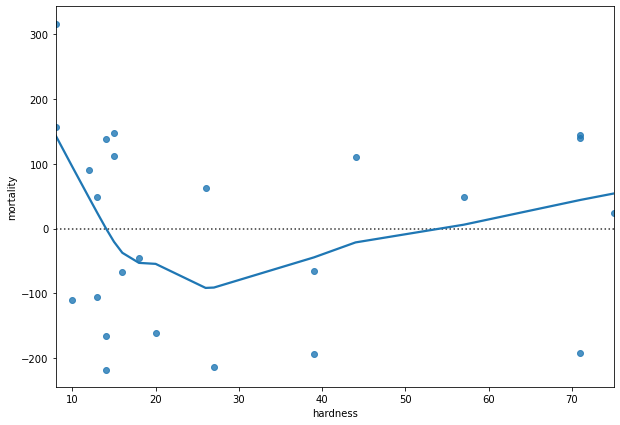

In [114]:
residuals = y_train-model_north.predict(x_train)
sns.residplot(x=x_train, y=y_train-model_north.predict(x_train), lowess=True)

<AxesSubplot:xlabel='mortality'>

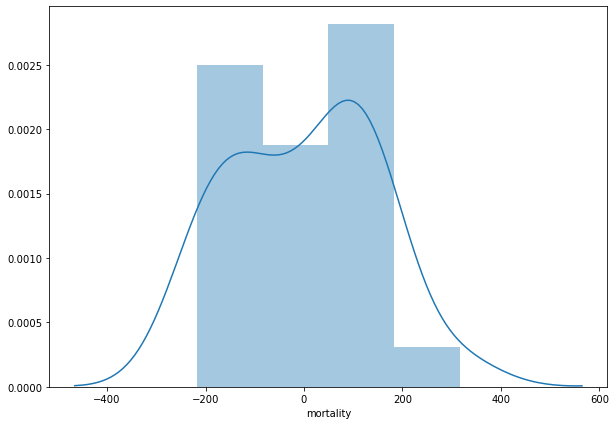

In [116]:
sns.distplot(residuals)

В целом, получили картину, сопоставимую с полным датафреймом. Модель предполагает наличие обратной зависимости смертности от жесткости воды. Остатки распределены хаотично.

Теперь взглянем на южные города:

<AxesSubplot:xlabel='hardness', ylabel='mortality'>

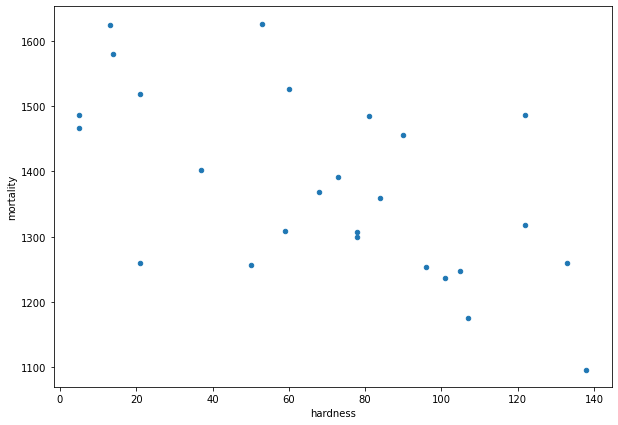

In [120]:
df_south.plot(kind='scatter', x='hardness', y='mortality')

In [121]:
# коэффициент Пирсона
df_south[['hardness', 'mortality']].corr()

,hardness,mortality
hardness,1.000000,-0.602153
mortality,-0.602153,1.000000


In [122]:
# коэффициент Спирмана
df_south[['hardness', 'mortality']].corr(method='spearman')

,hardness,mortality
hardness,1.000000,-0.595723
mortality,-0.595723,1.000000


На графике мало точек и на первый взгляд кажется, что они разбросаны достаточно хаотично, наша предполагаемая зависимость менее очевидна. Однако математически коэффициенты Пирсона и Спирмена предполагают с большей степенью уверенности, чем в случае с северными городами, наличие обратной взаимосвязи.

In [123]:
x = df_south[['hardness']]
y = df_south['mortality']

In [124]:
# подберем параметр random_state для модели
lst_index = []
model_south = LinearRegression()
for i in range(1, 10000):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=i)
    model_south.fit(x_train, y_train)
    if model_south.score(x_test, y_test) > 0.3:
        lst_index.append((model_south.score(x_test, y_test), i))
        

print(max(lst_index, key=lambda item: item[0]))

(0.8070290759570379, 9323)


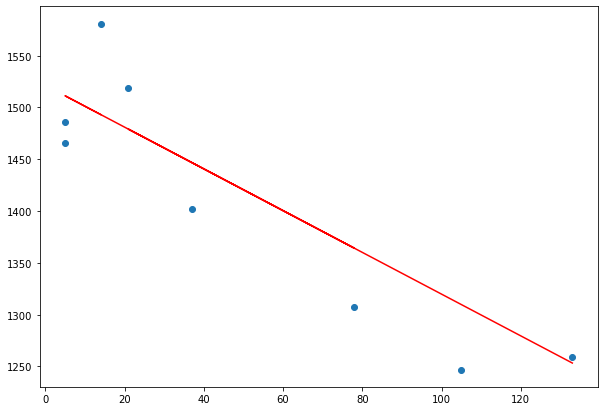

In [126]:
# построим модель
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=9323)
model_south.fit(x_train, y_train)
y_pred_south = model_south.predict(x_test)
plt.scatter(x_test, y_test)
plt.plot(x_test, y_pred_south, c='r')

In [127]:
model_south.score(x_test, y_test)

0.8070290759570379

<AxesSubplot:xlabel='hardness', ylabel='mortality'>

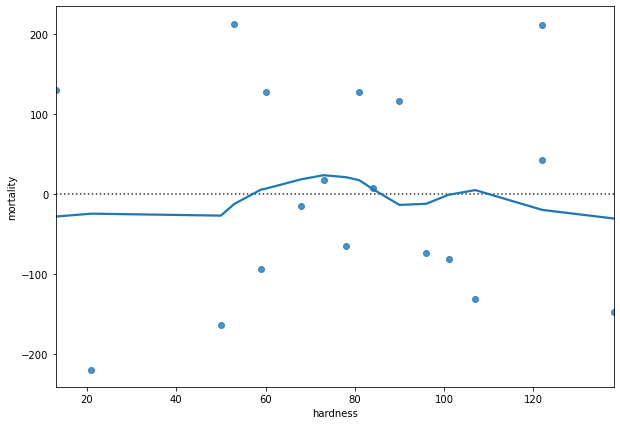

In [128]:
residuals = y_train-model_south.predict(x_train)
sns.residplot(x=x_train, y=y_train-model_south.predict(x_train), lowess=True)

<AxesSubplot:xlabel='mortality'>

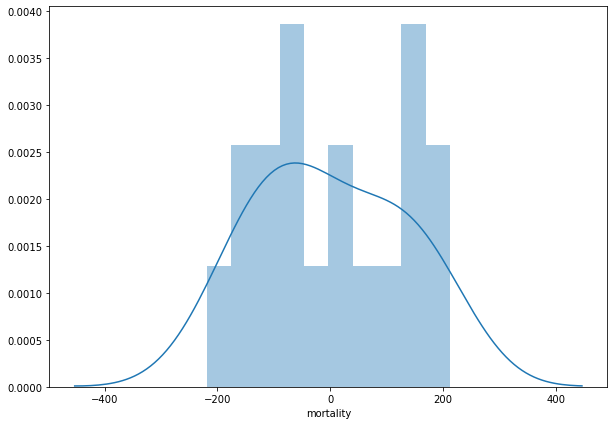

In [130]:
sns.distplot(residuals, bins=10)

И здесь наблюдаем аналогичное поведение модели и остатков. Сравнивая графики моделей для северных и южных городов между собой, можно сделать предположение, что для южных городов связь между рассматриваемыми переменными получается несколько более сильная, чем для северных